In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
from scipy.optimize import minimize
import scipy.constants as const

In [2]:
#cuts off a distance array such that it only has elements < a certain length

def dist_cutoff(dist, dist_lim):
    distance = []
    for x in dist:
        if (x < dist_lim):
            distance.append(x)
    return np.asarray(distance)

In [3]:
#cuts off a density array at a given number of elements
#not in place

def dens_cutoff(dens, n_elements):
    densities = np.zeros(n_elements)
    for i in range(0, n_elements):
        densities[i] = dens[i]
    return densities

In [4]:
def simple_fun(r, rc):
    rho = (1.9e7 / (rc**4))
    term = (1 + 0.091*(r/rc)**2)**-8
    return rho * term

In [5]:
#X2 function for simple fit

def X2_fun_simple(x, dist, dens, dist_lim):
    rc = x[0]
    #rho = x[1] 
    r = dist_cutoff(dist, dist_lim)
    densities = dens_cutoff(dens, len(r))
    X2 = (((simple_fun(r, rc)) - densities)**2)
    return X2[0:len(X2)].sum()

In [6]:
#radial-density fitting function
#params are two nparrays
#analytic radial profile function

def fit_profile_simple(dist, dens, dist_lim):
    dist1 = np.sort(dist)
    dens1 = (-1)*(np.sort(dens*(-1)))
    params = (dist1, dens1, dist_lim)
    p = (0.17)
    x0 = np.asarray(p)
    result = minimize(X2_fun_simple, x0, args = params)
    return result

params for 1.5: 0.15621690272912372
params for 2: 0.16249268108552548
params for Inf: 0.17934338901386154


(0.01, 25.118864315095795)

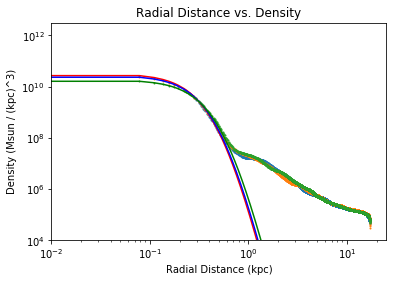

In [36]:
# Testing Gaussian fitting
path15 ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path2 ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'

hf15 = h5py.File(path15, 'r')
hf2 = h5py.File(path2, 'r')
hfInf = h5py.File(pathInf, 'r')

dist15 = np.array(hf15['distances'])
dens15 = np.array(hf15['densities'])

dist2 = np.array(hf2['distances'])
dens2 = np.array(hf2['densities'])

distInf = np.array(hfInf['distances'])
densInf = np.array(hfInf['densities'])

res15 = fit_profile_simple(dist15, dens15, 0.65)
res2 = fit_profile_simple(dist2, dens2, 0.65)
resInf = fit_profile_simple(distInf, densInf, 0.65)

#testing
rc15 = res15.x[0]
rc2 = res2.x[0]
rcInf = resInf.x[0]

print("params for 1.5: " + str(rc15))
print("params for 2: " + str(rc2))
print("params for Inf: " + str(rcInf))

plt.scatter(dist15, dens15, s = 1)
plt.scatter(dist2, dens2, s = 1)
plt.scatter(distInf, densInf, s = 1)

plt.plot(dist15, simple_fun(dist15, rc15), 'r')
plt.plot(dist2, simple_fun(dist2, rc2), 'b')
plt.plot(distInf, simple_fun(distInf, rcInf), 'g')


plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Density (Msun / (kpc)^3)')
plt.title('Radial Distance vs. Density')
plt.ylim(10**4, 10**(12.5))
plt.xlim(10**(-2), 10**(1.4))


In [26]:
# In simple fit case, computing rc as a function of f
f_vals = [np.Inf, 4, 2, 1.75, 1.5, 1.25, 1.1875, 1.1562, 1.1484]
f = np.asarray(f_vals)
rc_vals = np.zeros(len(f_vals))
X2_vals = np.zeros(len(f_vals))

pathInf = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
path4 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f4L20T4n400r256/radial0400.h5'
path2 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f2L20T4n400r256/radial0400.h5'
path175 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.75L20T4n40r256/radial0040.h5'
path15 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.5L20T4n400r256/radial0400.h5'
path125 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.25L20T4n40r256/radial0040.h5'
path11875 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1875L20T4n40r256/radial0040.h5'
path11562 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1562L20T4n40r256/radial0040.h5'
path11484 = '/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/f1.1484L20T4n40r256/radial0040.h5'

paths = [pathInf, path4, path2, path175, path15, path125, path11875, path11562, path11484]

for i in range(0, len(paths)):
    hf = h5py.File(paths[i], 'r')
    dist = np.array(hf['distances'])
    dens = np.array(hf['densities'])
    res = fit_profile_simple(dist, dens, 0.65)
    rc = np.abs(res.x[0])
    plt.scatter(dist, dens, s = 1)
    plt.plot(dist, simple_fun(dist, rc), 'r')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('Radial Distance (kpc)')
    plt.ylabel('Density (Msun / (kpc)^3)')
    plt.title('Radial Distance vs. Density, f = ' + str(f_vals[i]))
    plt.ylim(10**4, 10**(12.5))
    plt.xlim(10**(-2), 10**(2))
    rcstr = 'rc = ' + "%.2f" % rc
    plt.legend([rcstr])
    plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/simple_function/simple_fit_f' + str(f_vals[i]) + '.png', dpi = 200)
    plt.clf()
    
    rc_vals[i] = np.abs(rc)
    X2_vals[i] = res.fun 

# rc
plt.scatter((f**-1), rc_vals)
plt.xlabel('1/f')
plt.ylabel('rc')
plt.title('rc parameter as a function of f^-1')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/simple_function/param_scaling.png', dpi = 200)
plt.clf()

#X2
plt.scatter((f**-1), X2_vals)
plt.xlabel('1/f')
plt.ylabel('X2')
plt.title('X2 as a function of f^-1')
plt.savefig('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/simple_function/X2_scaling.png', dpi = 200)
plt.clf()

params = h5py.File('/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/pics/function_fitting/simple_function/simple_params.h5', 'w')
params.create_dataset('f', data=f_vals)
params.create_dataset('rc', data=rc_vals)
params.create_dataset('X2', data=X2_vals)
params.close()

<Figure size 432x288 with 0 Axes>

0.17934338901386154


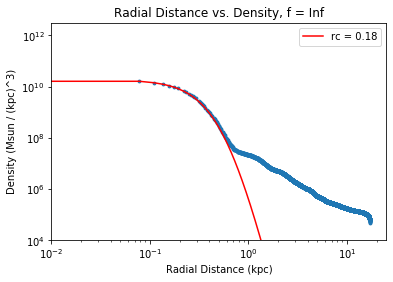

In [16]:
pathInf ='/mnt/c/Users/Noah Notis/Dropbox/USRP2020_Noah/src/FDM2020/rad_files/fInfL20T4n400r256/rad_filesradial0400.h5'
hf125 = h5py.File(pathInf, 'r')
dist125 = np.array(hf125['distances'])
dens125 = np.array(hf125['densities'])
res = fit_profile_simple(dist125, dens125, 0.65)
rc125 = np.abs(res.x[0])
print(res.x[0])

plt.plot(dist125, simple_fun(dist125, rc125), 'r')
plt.scatter(dist125, dens125, s = 8)

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radial Distance (kpc)')
plt.ylabel('Density (Msun / (kpc)^3)')
plt.title('Radial Distance vs. Density, f = Inf')
plt.ylim(10**4, 10**(12.5))
plt.xlim(10**(-2), 10**(1.4))
rcstr = 'rc = ' + "%.2f" % rc125
plt.legend([rcstr])
plt.savefig('/mnt/c/Users/Noah Notis/Desktop/infinite_example.png', dpi = 200)